In [15]:
import re
import random
import matplotlib.pyplot as plt
import numpy as np
#dictionary to convert nucleotides to Amino acids
Codons = { "GCU": "A", "GCC": "A", "GCA": "A", "GCG": "A",
"UUU": "F", "UUC": "F",
"UUA": "L", "UUG": "L", "CUU": "L", "CUC":"L", "CUA": "L", "CUG": "L",
"AUU": "I", "AUC": "I", "AUA": "I",
"AUG": "M",
"GUU": "V", "GUC": "V", "GUA": "V", "GUG": "V",
"UCU":"S", "UCC": "S", "UCA": "S", "UCG": "S",
"CCU": "P", "CCC": "P", "CCA": "P", "CCG": "P",
"ACU": "T", "ACC": "T", "ACA": "T", "ACG": "T", 
"UAU": "Y", "UAC": "Y",
"UAA": "STOP", "UAG": "STOP", "UGA": "STOP",
"CAU": "H", "CAC": "H",
"CAA": "Q", "CAG": "Q",
"AAU": "N", "AAC": "N",
"AAA": "K", "AAG": "K",
"GAU": "D", "GAC": "D", 
"GAA": "E", "GAG": "E",
"UGU": "C", "UGC": "C",
"UGG": "W",
"CGU": "R", "CGC": "R", "CGA": "R", "CGG": "R", "AGA": "R", "AGG": "R",
"AGU":"S", "AGC":"S",
"GGU": "G", "GGC": "G", "GGA": "G", "GGG": "G" }




In [3]:
class RNA:
    """A class used to store RNA sequences, protein counterpart, 
    and frequency of secondary characteristics"""
    RNA_sequence=""
    protein=[]
    falpha=0   #amount of alpha helices
    fbeta=0 #frequency of beta strands
    
    def create(self,length=4002):
        """Creates random RNA sequence and translates it to 
        protein sequence"""
        #creates list of nucleotides
        
        RNA = random.choices(['A','C','G','U'], k=length)
        for i in RNA:
            self.RNA_sequence = self.RNA_sequence+i
        seq= self.RNA_sequence 
        seqLength = len(seq)
        self.protein=[]
        #for loop that groups nucleaic acids into codons and then 
        #into amino acids
        for i in range(3,seqLength + 1,3): 
                self.protein.append(Codons.get(seq[i-3:i]))
        #removes all stop codons from the protein
        k = "STOP"
        while(k in self.protein): 
            self.protein.remove(k)
            
            
    def AAbool(self,x,y):
        """Function to aid in alpha helix finder. Boolean that discovers 
        if close amino acids are compatible"""
        Phobic= ['G','A','P','V','L','I','M','F','Y','W']
        Philic= ['S','T','C','N','Q']
        Negative=['D','E']
        Positive=['K','R','H']
        if x == 'G' or x=='P':
            return(False)
        if y == 'G' or y=='P':
            return(False)
        elif x in Phobic and y in Phobic:
            return(True)
        elif x in Philic and (y in Philic or y in Negative or y in Positive):
            return(True)
        elif x in Negative and (y in Positive or y in Philic):
            return(True)
        elif x in Positive and (y in Negative or y in Philic):
            return(True)
        else:
            return(False)
                
        
    def alpha(self):
        """Finds the amount of alpha helices in the protein"""
        i= 0
        Counter= 0
        Counterlist = []
        #runs a loop over the entire protein and records when there are more than nine positive interactions in 
        #a row, meaning a alpha helix is most likely present
        while i < (len(self.protein)-3):
            if self.AAbool(self.protein[i], self.protein[i+3]) == True:
                Counter = Counter+1
            else:
                if Counter > 9:
                    Counterlist.append(Counter)
                Counter = 0
            i= i+1
        self.falpha= len(Counterlist)
        
    def ABbool(self,w,x,y,z):
        """Function that aids in Beta strands finder. 
        Determines if there are beta turns"""
        carbonyl= ['N','Q','D','E']
        amino= ['N','Q']
        if w not in carbonyl:
            return(False)
        elif x != 'P':
            return(False)
        elif y != 'G':
            return(False)
        elif z not in amino:
            return(False)
        else:
            return(True)
            
    def beta(self):
        """Finds the amount of beta strands in the protein"""
        i= 0
        Turnlist = []
        #runs a loop over the entire protein and records whether a turn is present or not
        while i < (len(self.protein)-3):
            Turnlist.append(self.ABbool(self.protein[i], self.protein[i+1],self.protein[i+2],self.protein[i+3]))
            i= i+1
        #runs a loop that finds distances between True statements and if less 
        #than 30 amino acids apart then records a beta strand
        Counterb= 0
        Number=[]
        for i in Turnlist:
            if i == True:
                Number.append(Turnlist.index(i))
        for i in range(len(Number)-1):
    #this is how many acids are between beta turns to make a strand
            if ((Number[i+1])-Number[i])<200: 
                Counterb = Counterb +1
        self.fbeta= Counterb
            
        
        
        

In [4]:
A= RNA()
A.create(100000)

In [5]:
A.alpha()

In [6]:
A.falpha

2

In [7]:
A.beta()

In [8]:
A.fbeta

1

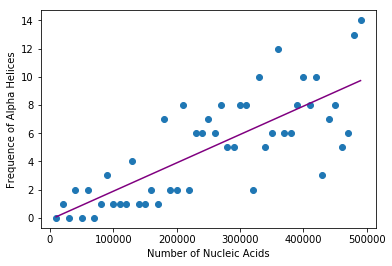

In [23]:
#graph for alpha helices
y=[0,1,0,2,0,2,0,1,3,1,1,1,4,1,1,2,1,7,2,2,8,2,6,6,7,6,8,5,5,8,8,2,10,5,6,12,6,6,8,10,8,10,3,7,8,5,6,13,14]
x= range(10000,500000,10000)
plt.scatter(x,y)
plt.ylabel("Frequence of Alpha Helices")
plt.xlabel("Number of Nucleic Acids")
#plotting linear fit line
a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b, color= 'purple')
plt.show()

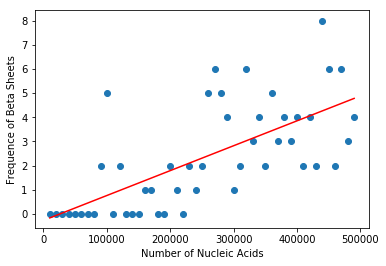

In [24]:
#graph for beta sheets
x= range(10000,500000,10000)
y=[0,0,0,0,0,0,0,0,2,5,0,2,0,0,0,1,1,0,0,2,1,0,2,1,2,5,6,5,4,1,2,6,3,4,2,5,3,4,3,4,2,4,2,8,6,2,6,3,4]
plt.scatter(x,y)
plt.ylabel("Frequence of Beta Sheets")
plt.xlabel("Number of Nucleic Acids")
#plotting linear fit line
a, b = np.polyfit(x, y, 1)   
plt.plot(x, a*x+b, color= 'red')
plt.show()